
# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, you will be able to:


* understand Bias and Variance    
* know how does the degree of the polynomial affect the bias and variance

In [ ]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.talentsprint.com/talentsprint1/archives/sc/aiml/module_2_week_8_experment_3.mp4" type="video/mp4">
</video>
""")

## Dataset

### Description

In this experiment we have chosen sine curve a real data.  As the real-world is never perfectly clean however, we add noise to the curve to show that the real world data is noisy. This is done by adding a small random number to each value. 


## AI /ML Technique

In this experiment, we use the sine curve to understand how the change in bias and variance effects the degree of polynomial.


### Bias and Variance:

The **bias** is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting). 

The **variance** is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting). The below image shows how the overfitting and underfitting looks.

![alt text](https://cdn.talentsprint.com/aiml/Experiment_related_data/IMAGES/Overfitting.png)




You can use any polynomial of higher order to project the idea of bias and variance. However, the sine values suits our experiment better because, it is a curve which is complex enough not to fit with simple linear or quadratic equations (to show bias) however it will overfit our data with higher order polynomials (6th order).

We want to try and capture the data using a polynomial function. A polynomial is defined by the degree, or the highest power for the x-values. A line has a degree of 1 because it is of the form $y = m_1*x + c$ where $m$ is the slope and $c$ is the intercept. A third degree polynomial would have the form $y = m_3 * x^3 + m_2 * x^2 + m_1* x + c$ and so on. The higher the degree of the polynomial, the more flexible the model.


We use fit_poly() to create a polynomial function with the specified number of degrees and plots the results. We can use these results to determine the optimal degrees to achieve the right balance between overfitting and underfitting. 


In this experiment, we will try : 
* To observe how the model changes with changing degrees.
* To estimate the errors.

### Importing the required packages

In [ ]:
import numpy as np
import pandas as pd

# Scikit-Learn packages for fitting models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# For plotting 
import matplotlib.pyplot as plt

### Generating the Data

We define a curve, in this case a sine curve to serve as our process that generates the data. As the real-world is never perfectly clean however, we also need to add some noise into the observations. This is done by adding a small random number to each value.

In [ ]:
# Set the random seed for reproducible results
np.random.seed(42)
 
# Generating function representing a process in real life
def true_gen(x):
    y = np.sin(1.2 * x * np.pi) 
    return(y)

# x values and y value with a small amount of random noise
x = np.sort(np.random.rand(120))
y = true_gen(x) + 0.1 * np.random.randn(len(x)) # Basically for each value of pure sin(x), we are adding a small random value 

In [ ]:
np.random.randn(len(x))

array([ 0.07580456, -0.67716171,  0.97511973, -0.14705738, -0.8254972 ,
       -0.32138584,  0.41293145, -0.56372455, -0.8222204 ,  0.24368721,
        0.24496657, -0.50694318, -0.47103831,  0.23204994, -1.44808434,
       -1.40746377, -0.71844422, -0.21344715,  0.31090757,  1.47535622,
        0.85765962, -0.15993853, -0.01901621, -1.00252936, -0.01851314,
       -0.28865864,  0.32271856, -0.82723094,  0.51934651,  1.53273891,
       -0.10876015,  0.40171172,  0.69014399, -0.40122047,  0.22409248,
        0.0125924 ,  0.0976761 , -0.77300978,  0.02451017,  0.49799829,
        1.45114361,  0.95927083,  2.15318246, -0.76734756,  0.87232064,
        0.18334201,  2.18980293, -0.80829829, -0.83972184, -0.59939265,
       -2.12389572, -0.52575502, -0.75913266,  0.15039379,  0.34175598,
        1.87617084,  0.95042384, -0.57690366, -0.89841467,  0.49191917,
       -1.32023321,  1.83145877,  1.17944012, -0.46917565, -1.71313453,
        1.35387237, -0.11453985,  1.23781631, -1.59442766, -0.59

### Training and Testing

The np.random.choice() method returns a randomly selected element from the specified sequence.

In [ ]:
# Random indices for creating training and testing sets
random_ind = np.random.choice(list(range(120)), size = 120, replace=False)
x_t = x[random_ind] # For the elements in the array x, random elements are chosen based on the index deterimined by random_ind
y_t = y[random_ind]

# Training and testing observations
train = x_t[:int(0.7 * len(x))] # We are now choosing 70% of data as training and the remaining as test.
test = x_t[int(0.7 * len(x)):]

y_train = y_t[:int(0.7 * len(y))]
y_test = y_t[int(0.7 * len(y)):]

# Model the true curve. As you might have noticed, here too we are calling the true_gen method. But here the difference is..
# ...the input is a continuous values of x (determined by np.linspace, which gives uniformly spaced values) for that we are getting
# ..the sin(x) value, and thus fit_poly(train, y_train, test, y_test, degrees = 1, plot='test') this time plotting the sine curve itself (above we just created 'points' following sine curve)
x_linspace = np.linspace(0, 1, 1000)
y_true = true_gen(x_linspace)

In [ ]:
x_t.shape, y_t.shape

((120,), (120,))

### Visualization

Text(0.5, 1.0, 'Data')

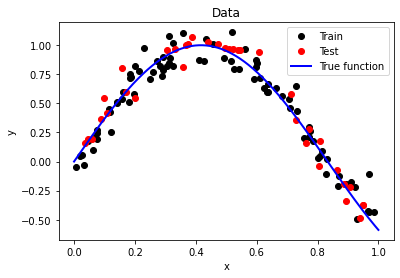

In [ ]:
# Visualize observations and true curve
plt.plot(train, y_train, 'ko', label = 'Train')
plt.plot(test, y_test, 'ro', label = 'Test')
plt.plot(x_linspace, y_true, 'b-', linewidth = 2, label = 'True function')
plt.legend()
plt.xlabel('x')
plt.ylabel('y') 
plt.title('Data')

### Polynomial Model

We want to try and capture the data using a polynomial function. A polynomial is defined by the degree, or the highest power for the x-values. A line has a degree of 1 because it is of the form $y = m_1*x + c$ where $m$ is the slope and $c$ is the intercept. A third degree polynomial would have the form $y = m_3 * x^3 + m_2 * x^2 + m_1* x + c$ and so on. The higher the degree of the polynomial, the more flexible the model.

The following function creates a polynomial with the specified number of degrees and plots the results. We can use these results to determine the optimal degrees to achieve the right balance between overfitting and underfitting.

In [ ]:
def fit_poly(train, y_train, test, y_test, degrees, plot='train', return_scores=False):
    
    # Creates a polynomial transformation model for the given degree. For example for degree 2, (x**0, x**1, x**2) i.e. if x=2 then 2**0, 2**1,2**2 => (1,2,4)
    # So a point in 1-D is converted to a point in 2-D, and so on for even higher degree. 
    features = PolynomialFeatures(degree=degrees, include_bias=False)
    
    # Reshape train features
    train = train.reshape(-1, 1)

    # Transforming the train features to higher order
    train_trans = features.fit_transform(train)

    # Create the Linear Regression model
    # Fit the transformed features to Linear Regression
    model = LinearRegression()
    model.fit(train_trans, y_train) 

    # Predicting on train data
    train_predictions = model.predict(train_trans)

    # Evaluating the model on training dataset
    training_error = mean_squared_error(y_train, train_predictions) 

    # Reshape test features and transform the features to higher order
    test = test.reshape(-1, 1)
    test_trans = features.fit_transform(test)
    
    # Predicting on test data
    test_predictions = model.predict(test_trans)

    # Evaluating the model on testing dataset
    testing_error = mean_squared_error(y_test, test_predictions)
    
    # Find the model curve and the true curve 
    x_curve = np.linspace(0, 1, 100)
    x_curve = x_curve.reshape(-1, 1)
    x_curve_trans = features.fit_transform(x_curve)
    
    # Model curve
    model_curve = model.predict(x_curve_trans)
    
    # True curve
    y_true_curve = true_gen(x_curve[:, 0])
    
    # Plot observations, true function, and model predicted function
    if plot == 'train':
        plt.plot(train[:, 0], y_train, 'ko', label = 'Observations')
        plt.plot(x_curve[:, 0], y_true_curve, linewidth = 4, label = 'True Function')
        plt.plot(x_curve[:, 0], model_curve, linewidth = 4, label = 'Model Function')
        plt.xlabel('x'); plt.ylabel('y')
        plt.legend()
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.title('{} Degree Model on Training Data'.format(degrees))
        plt.show()
        
    elif plot == 'test':
        # Plot the test observations and test predictions
        plt.plot(test, y_test, 'o', label = 'Test Observations')
        plt.plot(x_curve[:, 0], y_true_curve, 'b-', linewidth = 2, label = 'True Function')
        plt.plot(test, test_predictions, 'ro', label = 'Test Predictions')
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.legend(), plt.xlabel('x'), plt.ylabel('y')
        plt.title('{} Degree Model on Testing Data'.format(degrees)), plt.show();
    
     # Return the metrics
    if return_scores:
        return training_error, testing_error

### Fitting Model with Different Degrees

**Degrees = 1 -> Underfitting**

For example, a degree-1 polynomial fits a straight line to the data. In this case a linear model cannot accurately learn the relationship between x and y so it will underfit the data. This is because an underfit model has low variance and high bias. Variance refers to how much the model is dependent on the training data.

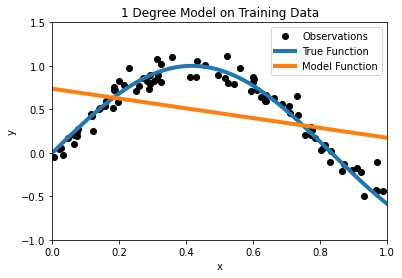

In [ ]:
fit_poly(train, y_train, test, y_test, degrees = 1, plot='train')

 The model predictions for the testing data are shown compared to the true function and testing data points

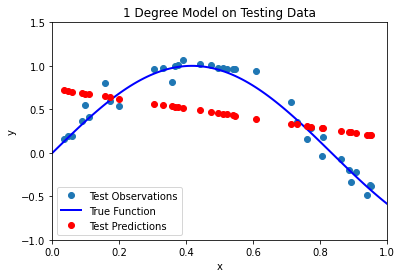

In [ ]:
fit_poly(train, y_train, test, y_test, degrees = 1, plot='test')

**Degrees = 25 -> Overfitting**
 An overfit model will have extremely low training error but a high testing error.

We can go in the completely opposite direction and create a model that overfits the data. This model has too much flexibility and learns the training data too closely. As the training data has some amount of noise, it will end up capturing that noise and will be misled by that noise when it tries to make predictions on the test data.

This is a model with a high variance, because it will change significantly depending on the training data.

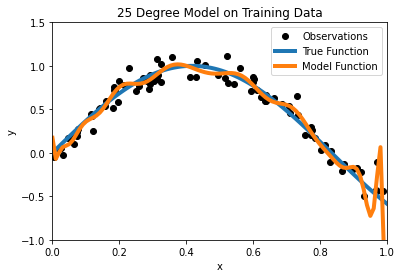

In [ ]:
fit_poly(train, y_train, test, y_test, degrees = 25, plot='train')

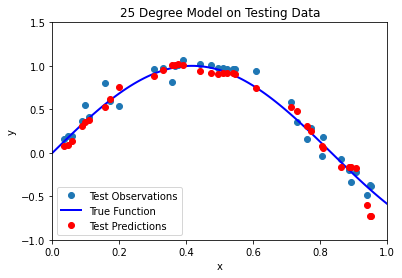

In [ ]:
fit_poly(train, y_train, test, y_test, degrees = 25, plot='test')

**Degrees = 5 -> Balanced Model**

Now that we have seen the two extremes, we can take a look at a model that does a good job of both accounting for the data while not following it too closely.


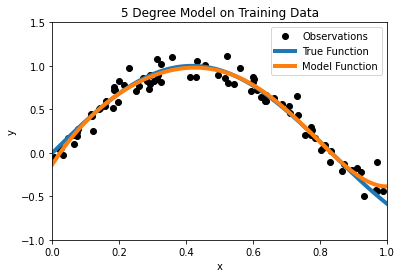

In [ ]:
fit_poly(train, y_train, test, y_test, degrees = 5, plot='train')

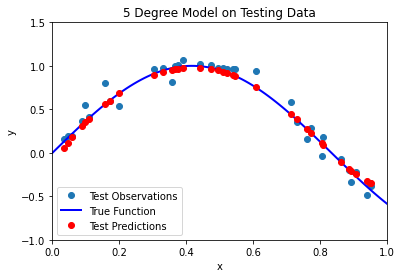

In [ ]:
fit_poly(train, y_train, test, y_test, degrees = 5, plot='test')

In [ ]:
# Range of model degrees to evaluate
degrees = [int(x) for x in np.linspace(1, 40, 40)]

# Store the results of a dataframe
results = pd.DataFrame(0, columns = ['train_error', 'test_error'], index = degrees)

# Try each value of degrees for the model and record the results
for degree in degrees:
    degree_results = fit_poly(train, y_train, test, y_test, degree, plot=False, return_scores=True)
    results.loc[degree, 'train_error'] = degree_results[0]
    results.loc[degree, 'test_error'] = degree_results[1]

### Evaluate Models

We will use a range of values to see how the performance on the training and testing set compares. A model with much lower errors on the training data than the testing data is overfit. A model with high error on the training data (which will lead to high testing error as well) is underfitting because it does not even learn the training data.

In [ ]:
print('Training Errors\n')
train_eval = results.sort_values('train_error').reset_index(level=0).rename(columns={'index': 'degrees'})
train_eval.loc[:,['degrees', 'train_error']].head(10)

Training Errors



,degrees,train_error
0,36,0.006137
1,35,0.006150
2,40,0.006213
3,39,0.006269
4,31,0.006357
5,27,0.006405
6,32,0.006416
7,28,0.006430
8,33,0.006442
9,29,0.006468


In [ ]:
print('Testing Errors\n')
test_eval = results.sort_values('test_error').reset_index(level=0).rename(columns={'index': 'degrees'})
test_eval.loc[:,['degrees', 'test_error']] .head(10)

Testing Errors



,degrees,test_error
0,5,0.009482
1,6,0.010215
2,4,0.010483
3,8,0.010609
4,7,0.010618
5,9,0.010754
6,14,0.011216
7,10,0.011321
8,11,0.011342
9,13,0.011387


### Plotting Training and Testing Error

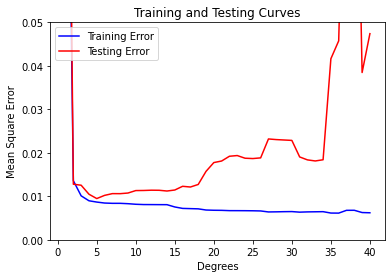


Minimum Training Error occurs at 36 degrees.
Minimum Testing Error occurs at 5 degrees.



In [ ]:
# Plotting both the train and test against the model complexity
plt.plot(results.index, results['train_error'], 'b', label = 'Training Error')
plt.plot(results.index, results['test_error'], 'r',  label = 'Testing Error')
plt.legend(loc=2)
plt.xlabel('Degrees')
plt.ylabel('Mean Square Error')
plt.title('Training and Testing Curves');
plt.ylim(0, 0.05) 
plt.show()

print('\nMinimum Training Error occurs at {} degrees.'.format((results['train_error'].idxmin())))
print('Minimum Testing Error occurs at {} degrees.\n'.format((results['test_error'].idxmin())))
